<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/CNN_for_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Model

In [17]:
cifar10= tf.keras.datasets.cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0, x_test /255.0
y_train,y_test=y_train.flatten(),y_test.flatten()
print("X_train-shape:", x_train.shape)

X_train-shape: (50000, 32, 32, 3)


In [18]:
K=len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [19]:
x_train[0].shape

(32, 32, 3)

In [20]:
i=Input(shape=x_train[0].shape)

x=Conv2D(32,(3,3),strides=2,activation='relu',padding='same')(i)     #padding='same' evitare che l'immagine si rimpicciolisca troppo
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),strides=2,activation='relu',padding='same')(x)     
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Conv2D(64,(3,3),strides=2,activation='relu',padding='same')(x)     
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),strides=2,activation='relu',padding='same')(x)     
x=BatchNormalization()(x)
x=MaxPooling2D((2,2), padding='same')(x)


x=Conv2D(128,(3,3),strides=2,activation='relu',padding='same')(x)     
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),strides=2,activation='relu',padding='same')(x)     
x=BatchNormalization()(x)
x=MaxPooling2D((2,2), padding='same')(x) 

x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
batch_size=32
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator=data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch=x_train.shape[0] // batch_size
r=model.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
1562/1562 [==============================] - 75s 47ms/step - loss: 1.6631 - accuracy: 0.3973 - val_loss: 1.3643 - val_accuracy: 0.5048
Epoch 2/50
1562/1562 [==============================] - 70s 45ms/step - loss: 1.4076 - accuracy: 0.4960 - val_loss: 1.3182 - val_accuracy: 0.5254
Epoch 3/50
1562/1562 [==============================] - 71s 45ms/step - loss: 1.3081 - accuracy: 0.5366 - val_loss: 1.2039 - val_accuracy: 0.5729
Epoch 4/50
1562/1562 [==============================] - 72s 46ms/step - loss: 1.2384 - accuracy: 0.5630 - val_loss: 1.1628 - val_accuracy: 0.5792
Epoch 5/50
1562/1562 [==============================] - 71s 46ms/step - loss: 1.1862 - accuracy: 0.5852 - val_loss: 1.1648 - val_accuracy: 0.5900
Epoch 6/50
1562/1562 [==============================] - 71s 46ms/step - loss: 1.1439 - accuracy: 0.5957 - val_loss: 1.1402 - val_accuracy: 0.5967
Epoch 7/50
1562/1562 [==============================] - 72s 46ms/step - loss: 1.1111 - accuracy: 0.6113 - val_loss: 1.0290 -

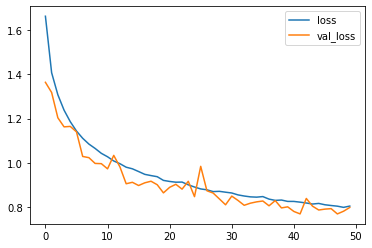

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

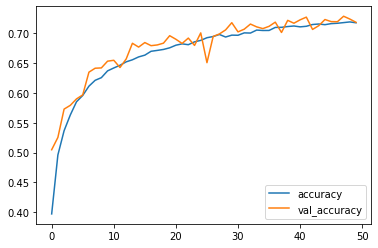

In [23]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

confusion matrix without normalization
[[719  25  55  19  22   6  19  21  58  56]
 [  9 831   4   5   3   4   5   8   9 122]
 [ 50   7 601  24  88  54 104  48  10  14]
 [  9  14  57 443  58 168 149  66  10  26]
 [ 12   2  53  35 633  26 115 112   7   5]
 [ 11   5  28 167  44 574  70  90   2   9]
 [  5   4  21  31  19  13 890  10   2   5]
 [  9   6   9  24  28  55  19 831   3  16]
 [ 39  56  14   9  13   5   8   6 801  49]
 [ 17  60   4   9   3   4   8  18  17 860]]


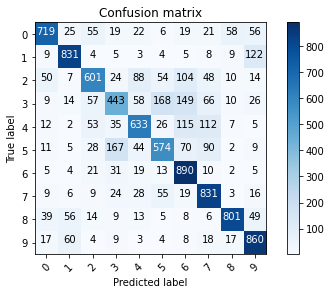

In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float') /cm.sum(axis=1)[:,np.newaxis]
    print("normalized confusion matrix")
  else:
    print("confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [25]:
#Label mapping
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: automobile Predicted: truck')

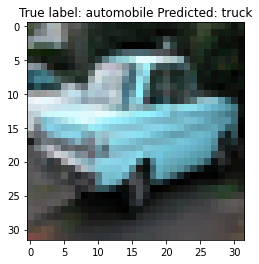

In [28]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
x_test[i].shape
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]))

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 batch_normalization_11 (Bat  (None, 8, 8, 32)         128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)         0   